In [1]:
from datetime import datetime
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

# #plt.show()

In [2]:
# Setting custom color palette from hex color codes 
"""
Hexcodes and Color Names
"#B38867", # Coffee
"#283655", # Blueberry
"#69983D", # Green Apple
"#D50000", # Guardsman Red
"#A57298", # Boquet
"#FFAA00", # Web Orange/Goldenrod
"#F18D93", # Pink Tulip
"#F0810F", # Tangerine
"#66A5AD", # Ocean
"""

color_names = "coffee, blueberry, green, red, boquet, goldenrod, pink tulip, tangerine, ocean".split(", ")
hexcodes = "#B38867 #283655 #69983D #D50000 #A57298 #FFAA00 #F18D93 #F0810F #66A5AD".split()
colors_codes = list(zip(color_names, hexcodes))
exercise_names = "Deadlift BackSquat OverheadSquat FrontSquat BenchPress ShoulderPress SnatchPress Snatch Clean&Jerk".split()
color_map= dict(zip(exercise_names, colors_codes))

In [3]:
color_df = pd.DataFrame.from_dict(color_map, orient="index", columns=["Color Name", "Hexcode"])
color_df

,Color Name,Hexcode
Deadlift,coffee,#B38867
BackSquat,blueberry,#283655
OverheadSquat,green,#69983D
FrontSquat,red,#D50000
BenchPress,boquet,#A57298
ShoulderPress,goldenrod,#FFAA00
SnatchPress,pink tulip,#F18D93
Snatch,tangerine,#F0810F
Clean&Jerk,ocean,#66A5AD


In [4]:
colors = color_df["Hexcode"].tolist()

In [5]:
palette = sns.set_palette(sns.color_palette(colors))
sns.set_context("paper")

In [6]:
df = pd.read_csv("workout_data_database.csv")
df.head()

,Unnamed: 0,exercise,sets,reps,weight_lbs,datetime,duration_minutes
0,0,Clean&Jerk,3,7,65,2018-07-24 00:00:00,-1.0
1,1,BenchPress,3,7,65,2018-07-24 00:00:00,-1.0
2,2,ShoulderPress,2,7,65,2018-07-25 00:00:00,-1.0
3,3,ShoulderPress,1,10,65,2018-07-25 00:00:00,-1.0
4,4,BackSquat,3,5,65,2018-07-23 00:00:00,-1.0


In [7]:
df.drop(columns =["Unnamed: 0"], inplace = True)
df.head()

,exercise,sets,reps,weight_lbs,datetime,duration_minutes
0,Clean&Jerk,3,7,65,2018-07-24 00:00:00,-1.0
1,BenchPress,3,7,65,2018-07-24 00:00:00,-1.0
2,ShoulderPress,2,7,65,2018-07-25 00:00:00,-1.0
3,ShoulderPress,1,10,65,2018-07-25 00:00:00,-1.0
4,BackSquat,3,5,65,2018-07-23 00:00:00,-1.0


In [8]:
workout_data_list = df.values.tolist()
workout_data_list[0:5]

[['Clean&Jerk', 3, 7, 65, '2018-07-24 00:00:00', -1.0],
 ['BenchPress', 3, 7, 65, '2018-07-24 00:00:00', -1.0],
 ['ShoulderPress', 2, 7, 65, '2018-07-25 00:00:00', -1.0],
 ['ShoulderPress', 1, 10, 65, '2018-07-25 00:00:00', -1.0],
 ['BackSquat', 3, 5, 65, '2018-07-23 00:00:00', -1.0]]

In [9]:
# This changes the "%Y-%m-%d %H:%M:%S" string format in the list to datetime format "%Y-%m-%d %H:%M:%S" 
# to be able to use seaborn graphs below.
for i in range(len(workout_data_list)):
    try:
        temp = datetime.strptime(workout_data_list[i][4], "%Y-%m-%d %H:%M:%S")
        temp.strftime("%Y-%m-%d %H:%M:%S")
        workout_data_list[i][4] = temp
    except:
        pass

In [10]:
workout_data = pd.DataFrame(workout_data_list)
workout_data.head()

,0,1,2,3,4,5
0,Clean&Jerk,3,7,65,2018-07-24,-1.0
1,BenchPress,3,7,65,2018-07-24,-1.0
2,ShoulderPress,2,7,65,2018-07-25,-1.0
3,ShoulderPress,1,10,65,2018-07-25,-1.0
4,BackSquat,3,5,65,2018-07-23,-1.0


In [11]:
workout_data.columns = "exercise, sets, reps, weight_lbs, datetime, duration_minutes".split(", ")
workout_data.head()

,exercise,sets,reps,weight_lbs,datetime,duration_minutes
0,Clean&Jerk,3,7,65,2018-07-24,-1.0
1,BenchPress,3,7,65,2018-07-24,-1.0
2,ShoulderPress,2,7,65,2018-07-25,-1.0
3,ShoulderPress,1,10,65,2018-07-25,-1.0
4,BackSquat,3,5,65,2018-07-23,-1.0


In [12]:
# A dataframe for total count of workouts for each exercise
workout_count = workout_data[["exercise", "datetime"]]
workout_count.head()

,exercise,datetime
0,Clean&Jerk,2018-07-24
1,BenchPress,2018-07-24
2,ShoulderPress,2018-07-25
3,ShoulderPress,2018-07-25
4,BackSquat,2018-07-23


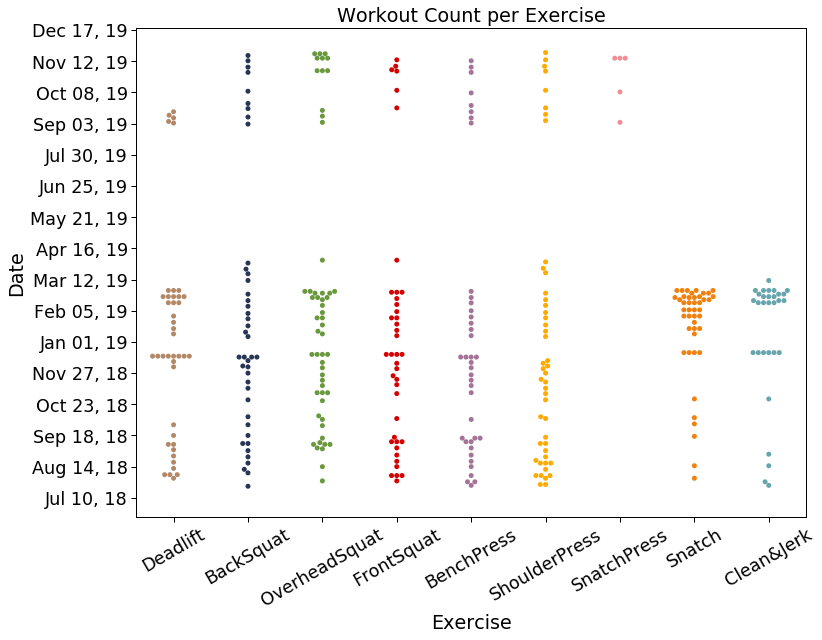

In [13]:
# Plot for total count of workouts for each exercise
plt.figure(figsize = (12,9))
sns.set_context("paper", font_scale = 2)
graph = sns.swarmplot(
    x="exercise", 
    y="datetime", 
    data=workout_count, 
    palette=colors, 
    order=exercise_names
    )
graph.set_xticklabels(graph.get_xticklabels(), rotation = 30)
graph.yaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.yaxis.set_major_formatter(mdates.DateFormatter("%b %d, %y"))
graph.set(
    title="Workout Count per Exercise", 
    xlabel="Exercise", 
    ylabel="Date"
    )
plt.savefig("Workout Count per Exercise.png")

In [14]:
# A dataframe for max weight by each exercise. 
exercise_max = workout_data[["exercise", "weight_lbs"]].groupby("exercise").max()
exercise_max["exercise"] = exercise_max.index
exercise_max.head()

,weight_lbs,exercise
exercise,,
BackSquat,225,BackSquat
BenchPress,175,BenchPress
Clean&Jerk,145,Clean&Jerk
Deadlift,245,Deadlift
FrontSquat,155,FrontSquat


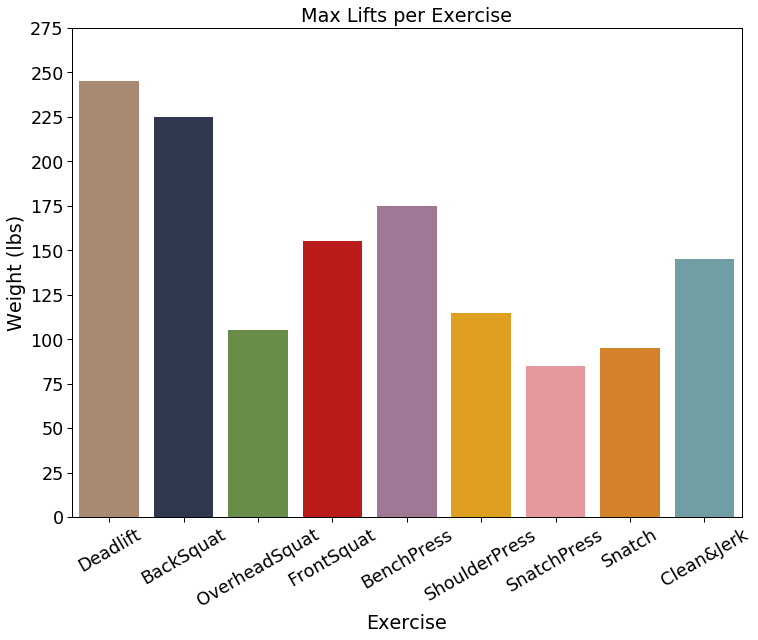

In [15]:
# Plot of max weight for each exercise
plt.figure(figsize = (12,9))
sns.set_context("paper", font_scale = 2)
graph = sns.barplot(
    x="exercise", 
    y="weight_lbs", 
    data=exercise_max, 
    order=exercise_names
    )
graph.set_xticklabels(graph.get_xticklabels(), rotation = 30)
graph.set(
    title="Max Lifts per Exercise", 
    xlabel="Exercise", 
    ylabel="Weight (lbs)", 
    yticks=np.arange(0, 300, 25)
    )
plt.savefig("Max Lifts per Exercise.png")

In [16]:
# A dataframe for total intensity(total weight lifted) for each exercise
total_intensity = workout_data[["exercise", "weight_lbs"]].groupby("exercise").sum()
total_intensity["exercise"] = total_intensity.index
total_intensity.head()

,weight_lbs,exercise
exercise,,
BackSquat,6760,BackSquat
BenchPress,4935,BenchPress
Clean&Jerk,2440,Clean&Jerk
Deadlift,6370,Deadlift
FrontSquat,4195,FrontSquat


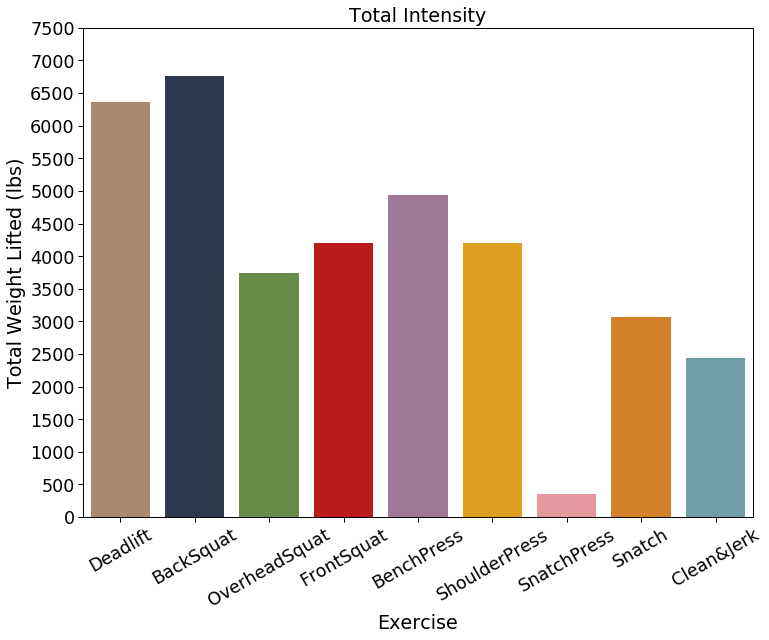

In [17]:
# Plot of total intensity for each exercise
plt.figure(figsize = (12,9))
sns.set_context("paper", font_scale = 2)
graph = sns.barplot(
    x="exercise", 
    y="weight_lbs", 
    data=total_intensity, 
    order=exercise_names
    )
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
graph.set(
    title="Total Intensity", 
    xlabel="Exercise", 
    ylabel="Total Weight Lifted (lbs)", 
    yticks=np.arange(0, 8000, 500)
    )
plt.savefig("Total Intensity.png")

In [18]:
# A dataframe for total volume for each exercise
total_reps = workout_data["sets"]*workout_data["reps"]
workout_data["total volume"] = total_reps
total_volume = workout_data[["exercise", "total volume"]].groupby("exercise").sum()
total_volume["exercise"] = total_volume.index
total_volume.head()

,total volume,exercise
exercise,,
BackSquat,952,BackSquat
BenchPress,815,BenchPress
Clean&Jerk,146,Clean&Jerk
Deadlift,596,Deadlift
FrontSquat,655,FrontSquat


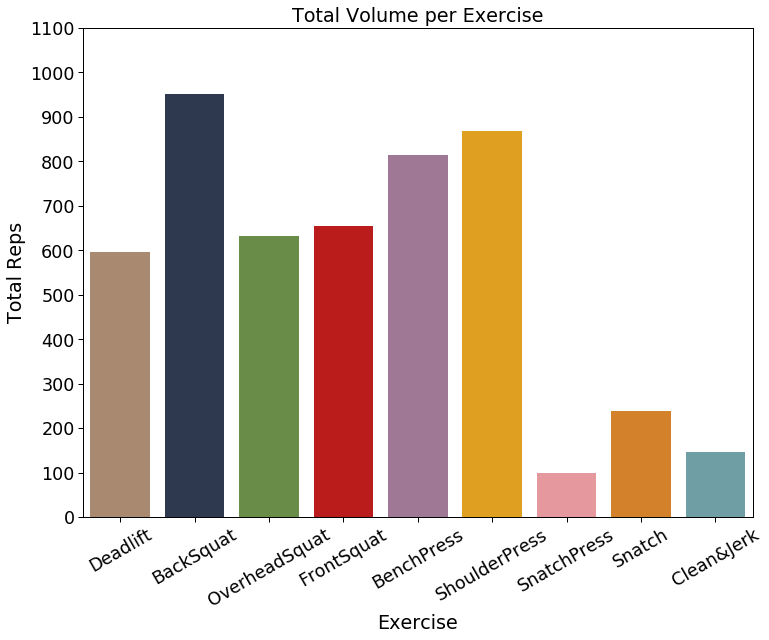

In [19]:
# Plot for total volume for each exercise
plt.figure(figsize = (12,9))
sns.set_context("paper", font_scale = 2)
graph = sns.barplot(
    x="exercise", 
    y="total volume", 
    data=total_volume, 
    order=exercise_names
    )
graph.set_xticklabels(graph.get_xticklabels(), rotation = 30)
graph.set(
    title="Total Volume per Exercise", 
    xlabel="Exercise", 
    ylabel="Total Reps", 
    yticks=np.arange(0, 1200, 100)
    )
plt.savefig("Total Volume.png")

In [20]:
squats = workout_data[["exercise", "datetime", "weight_lbs"]].loc[(workout_data["exercise"] == "BackSquat") | (workout_data["exercise"] == "OverheadSquat") | (workout_data["exercise"] == "FrontSquat")]
squats.head()

,exercise,datetime,weight_lbs
4,BackSquat,2018-07-23,65
8,FrontSquat,2018-07-29,45
9,OverheadSquat,2018-07-29,45
13,FrontSquat,2018-08-04,65
14,FrontSquat,2018-08-04,75


In [21]:
presses = workout_data[["exercise", "datetime", "weight_lbs"]].loc[(workout_data["exercise"] == "BenchPress") | (workout_data["exercise"] == "ShoulderPress")]
presses.head()

,exercise,datetime,weight_lbs
1,BenchPress,2018-07-24,65
2,ShoulderPress,2018-07-25,65
3,ShoulderPress,2018-07-25,65
5,BenchPress,2018-07-28,65
6,BenchPress,2018-07-28,65


In [22]:
oly_lifts = workout_data[["exercise", "datetime", "weight_lbs"]].loc[(workout_data["exercise"] == "Clean&Jerk") | (workout_data["exercise"] == "Snatch")]
oly_lifts.head()

,exercise,datetime,weight_lbs
0,Clean&Jerk,2018-07-24,65
7,Clean&Jerk,2018-07-28,65
12,Snatch,2018-08-01,65
30,Clean&Jerk,2018-08-15,45
31,Snatch,2018-08-15,45


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


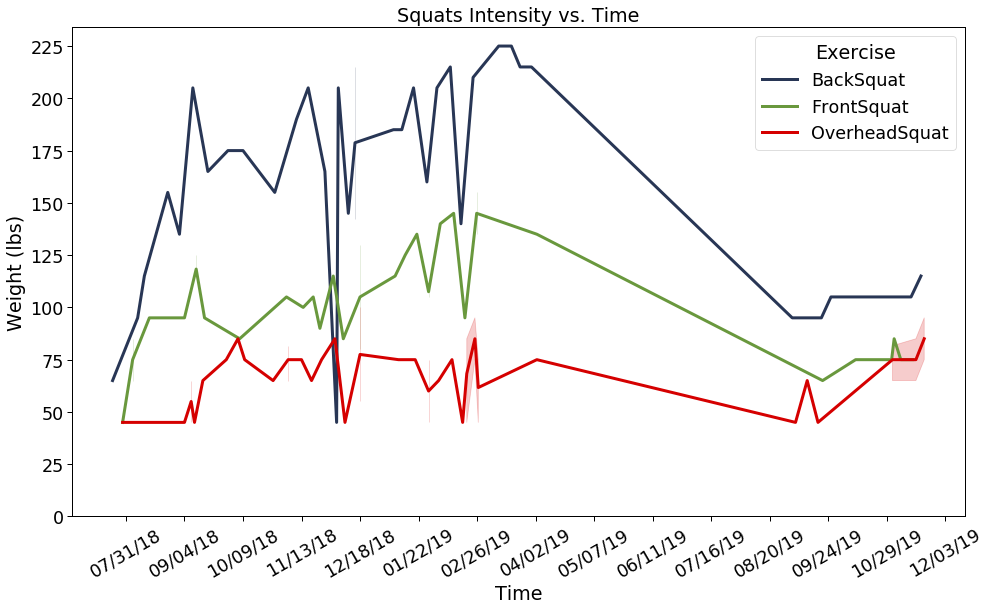

In [23]:
# Plot comparison for intensity for squats.
plt.figure(figsize = (16,9))

sns.set_context("paper", font_scale = 2)
graph = sns.lineplot(
    x="datetime", 
    y="weight_lbs", 
    data=squats, 
    palette=colors[1:4], 
    hue="exercise", 
    linewidth=3
    )
graph.set_xticklabels(squats["datetime"].values, rotation = 30)
graph.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d/%y"))
graph.set(
    title="Squats Intensity vs. Time", 
    xlabel="Time", 
    ylabel="Weight (lbs)", 
    yticks=np.arange(0, 250, 25)
    )
plt.legend(
    title="Exercise", 
    loc="upper right", 
    labels=squats["exercise"].unique()
    )
plt.savefig("Squats Intensity.png")

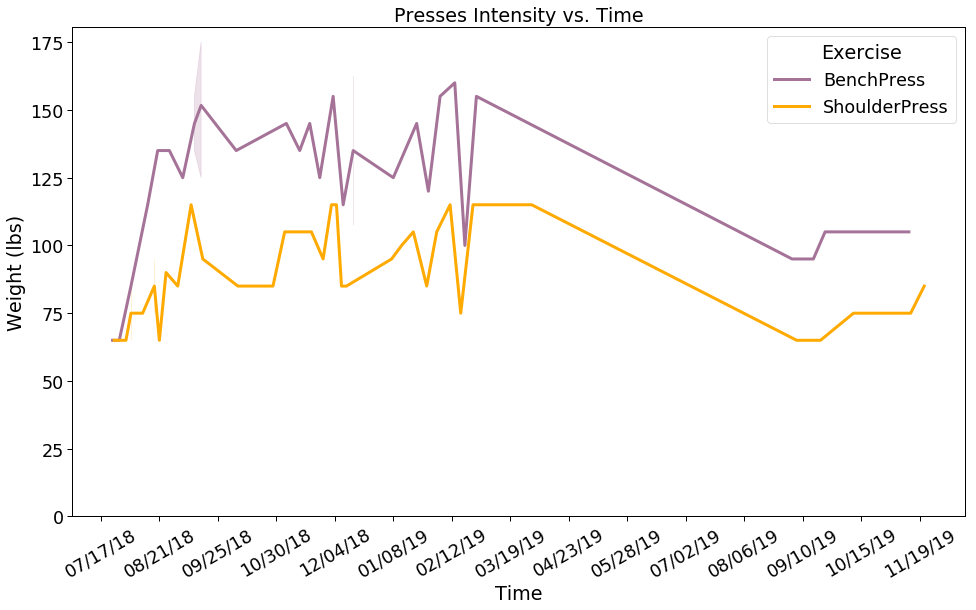

In [24]:
# Plot comparison for intensity for squats.
plt.figure(figsize = (16,9))

sns.set_context("paper", font_scale = 2)
graph = sns.lineplot(
    x="datetime", 
    y="weight_lbs", 
    data=presses, 
    palette=colors[4:6], 
    hue="exercise", 
    linewidth=3
    )
graph.set_xticklabels(presses["datetime"].values, rotation = 30)
graph.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d/%y"))
graph.set(
    title="Presses Intensity vs. Time", 
    xlabel="Time", 
    ylabel="Weight (lbs)", 
    yticks=np.arange(0, 200, 25)
    )
plt.legend(
    title="Exercise", 
    loc="upper right", 
    labels=presses["exercise"].unique()
    )
plt.savefig("Presses Intensity.png")

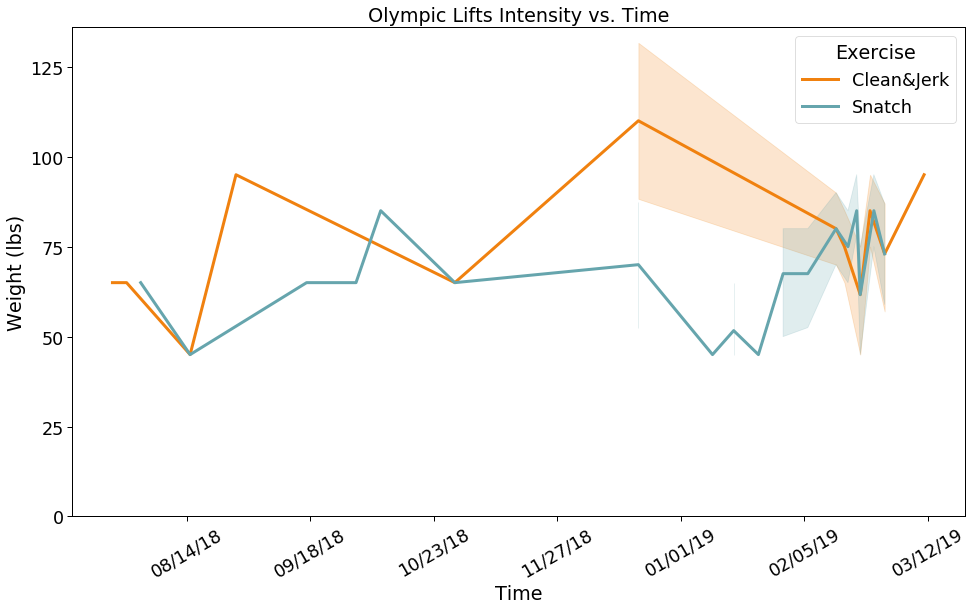

In [25]:
# Plot comparison for intensity for squats.
plt.figure(figsize = (16,9))

sns.set_context("paper", font_scale = 2)
graph = sns.lineplot(
    x="datetime", 
    y="weight_lbs", 
    data=oly_lifts, 
    palette=colors[7:9], 
    hue="exercise", 
    linewidth=3
    )
graph.set_xticklabels(oly_lifts["datetime"].values, rotation = 30)
graph.xaxis.set_major_locator(mdates.WeekdayLocator(interval=5))
graph.xaxis.set_major_formatter(mdates.DateFormatter("%m/%d/%y"))
graph.set(
    title="Olympic Lifts Intensity vs. Time", 
    xlabel="Time", 
    ylabel="Weight (lbs)",
    yticks=np.arange(0, 150, 25)
    )
plt.legend(
    title="Exercise", 
    loc="upper right", 
    labels=oly_lifts["exercise"].unique()
    )
plt.savefig("Olympic Lifts Intensity.png")